<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Gradient descent</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"></p>
</div>

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [88]:
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

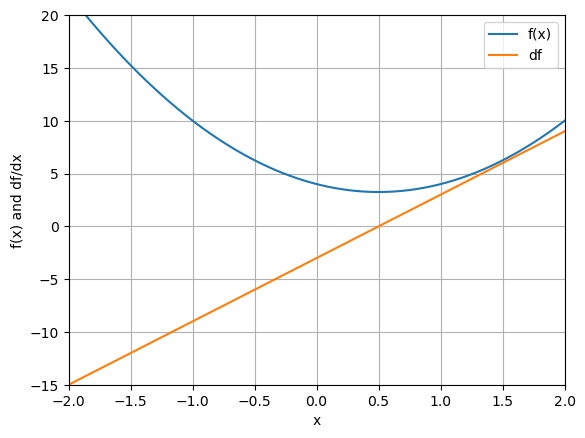

In [89]:
x = np.linspace(-2, 2, 4_001)

plt.plot(x, fx(x), x, deriv(x))
plt.xlabel('x')
plt.ylabel('f(x) and df/dx')
plt.legend(['f(x)', 'df'])
plt.grid('on')
plt.xlim([x[0], x[-1]])
plt.ylim([-15, 20])
plt.show()

In [90]:
# Gradient descent
# 1. Grab random x between -2 and 2
# 2. For a set number of iterations we get the derivative at x, and update x to (x - derivative * learningrate)
iterations = 1_000
learningrate = 0.01

index = np.random.randint(0, len(x))
localMin = x[index]
for i in range(iterations):
    localMin = localMin - (deriv(localMin) * learningrate)

localMin

0.49999999999999956

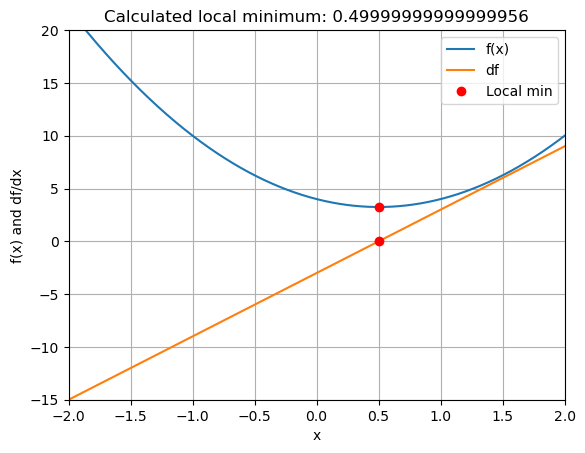

In [91]:
plt.plot(x, fx(x), x, deriv(x))
plt.plot([localMin, localMin], [fx(localMin), deriv(localMin)], 'ro')
plt.xlabel('x')
plt.ylabel('f(x) and df/dx')
plt.legend(['f(x)', 'df', 'Local min'])
plt.title(f'Calculated local minimum: {localMin}')
plt.grid('on')
plt.xlim([x[0], x[-1]])
plt.ylim([-15, 20])
plt.show()

In [92]:
iterations = 1_000
learningrate = 0.01

index = np.random.randint(0, len(x))
localMin = x[index]

modelParams = np.zeros((iterations, 2))

for i in range(iterations):
    df = deriv(localMin)
    localMin = localMin - (df * learningrate)
    modelParams[i,:] = localMin,df

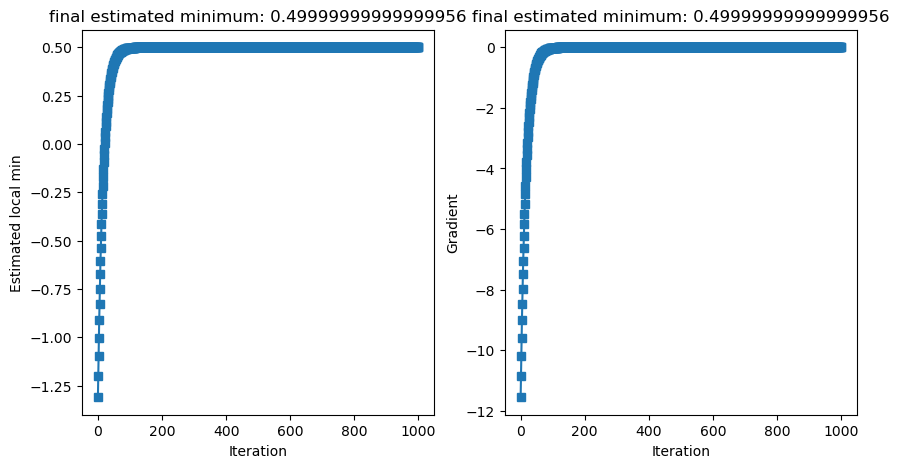

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(range(iterations), modelParams[:,0], 's-')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Estimated local min')
ax[0].set_title(f'final estimated minimum: {localMin}')

ax[1].plot(range(iterations), modelParams[:,1], 's-')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Gradient')
ax[1].set_title(f'final estimated minimum: {localMin}')

plt.show()

In [94]:
# Repeat in 2D

def peaks(x,y):
      # expand to a 2D mesh
    x,y = np.meshgrid(x,y)
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)
    return z

In [95]:
x = np.linspace(-3, 3, 601)
y = np.linspace(-3, 3, 601)

z = peaks(x, y)

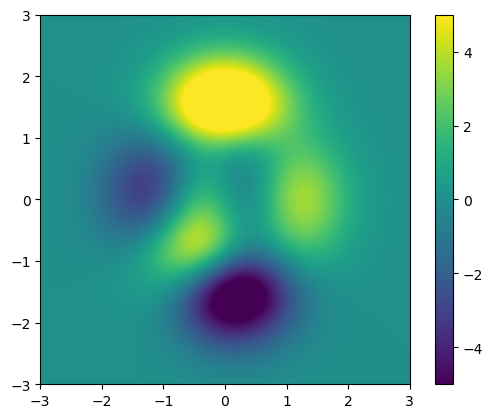

In [122]:
plt.imshow(z,extent=[-3, 3, -3, 3], origin='lower', vmin=-5, vmax=5)
plt.colorbar()
plt.show()

In [100]:
def peaksSym(x,y):
      # expand to a 2D mesh
    z = 3*(1-x)**2 * sym.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * sym.exp(-x**2-y**2) - 1/3*sym.exp(-(x+1)**2 - y**2)
    return z

In [105]:
# We calculate the derivative functions

sx,sy=sym.symbols('sx,sy')
sz = peaksSym(sx,sy)

dfX = sym.lambdify((sx,sy),sym.diff(sz,sx), 'sympy')
dfY = sym.lambdify((sx,sy),sym.diff(sz,sy), 'sympy')

In [113]:
dfX(1, 1).evalf()

-1.07369833656079

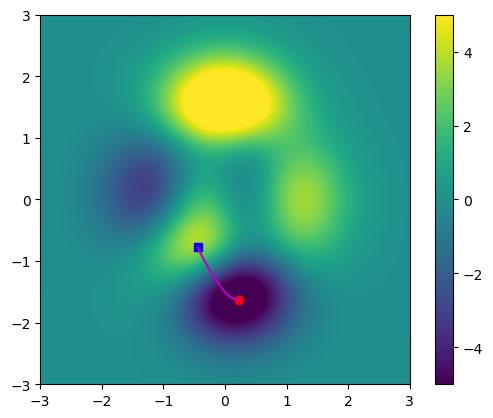

In [140]:
iterations = 1_000
learningrate = 0.01

modelParams = np.zeros((iterations, 2))
localmin = (np.random.rand(2) * 4) - 2

for i in range(iterations):
    dx = dfX(localmin[0], localmin[1]).evalf()
    dy = dfY(localmin[0], localmin[1]).evalf()
    grad = np.array([dx, dy])
    localmin = localmin - learningrate * grad
    modelParams[i,:] = localmin

plt.imshow(z,extent=[-3, 3, -3, 3], origin='lower', vmin=-5, vmax=5)
plt.plot(modelParams[0, 0], modelParams[0, 1], 'bs')
plt.plot(modelParams[-1, 0], modelParams[-1, 1], 'ro')
plt.plot(modelParams[:, 0], modelParams[:, 1], 'm')

plt.colorbar()
plt.show()